In [9]:
import numpy as np
import cv2
import os
import matplotlib.pyplot as plt
import pickle

In [2]:
# face_cascade = cv2.CascadeClassifier('frontface.xml')

In [13]:
path = "F:/Drowsiness_Detection/NewData/Data"
labels = ["drowsiness" , "undrowsiness"]
train = []
train_faces = []
size = 100
count = 0
folders = os.listdir(path)
face_cascade = cv2.CascadeClassifier("data/haarcascade_frontalface_alt.xml")
eye_cascade = cv2.CascadeClassifier("data/haarcascade_eye_tree_eyeglasses.xml")
save_path = "img_data"
for label in folders:
    print(label)
    count = 0
    class_name = labels.index(label)
    name = os.path.join(save_path,label)
    images = os.path.join(path,label)
    for image in os.listdir(images):
#         try:
        img = os.path.join(images,image)
        img_array = cv2.imread(img)
#         img_array = cv2.fastNlMeansDenoisingColored(img_array,None,10,10,7,21)
        gray = cv2.cvtColor(img_array, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(
            gray,
            scaleFactor=1.1,
            minNeighbors=5,
            minSize=(30, 30),
            # flags = cv2.CV_HAAR_SCALE_IMAGE
        )
        if len(faces)>0:
            
#         print(x,y,w,h)
            roi_image = img_array[faces[0][1]:faces[0][1] + faces[0][3], faces[0][0]:faces[0][0] + faces[0][2]:1, :]
            
#             roi_image = cv2.resize(roi_image , (size , size))
            n = os.path.join(name,image)
            
            cv2.imwrite(n, roi_image)
            roi_gray = gray[y:y+h,x:x+w]
            count+=1
#             eyes = eye_cascade.detectMultiScale(roi_gray,scaleFactor = 1.2, minNeighbors = 4)
            
#             for (ex,ey,ew,eh) in eyes:
#                 roi_image = img_array[ey:ey+eh,ex:ex+ew]
#                 plt.imshow(roi_image)
#                 plt.show()
                
#                 roi_image = cv2.resize(roi_image,(size,size))
                
#                 count+=1
            
#             color = (0,45,255)
#             stroke = 2
#             end_x = x+w
#             end_y = y+h
#             cv2.rectangle(img_array, (x,y), (end_x,end_y), color, stroke)
#             cv2.imwrite("test.jpg",img_array)
#         print(faces)
#         break
#             img_array = cv2.resize(img_array , (size , size))
#             train.append([img_array , class_name])
    
print(f"Total no. of samples : {count}")
   
        
        

drowsiness
undrowsiness
Total no. of samples : 1201


In [ ]:
import random
random.shuffle(train_faces)
for i in train_faces[:5]:
    print(labels[i[1]])



undrowsiness


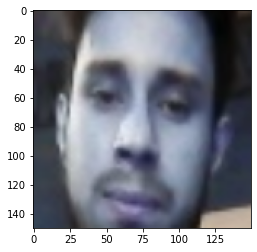

(6129, 150, 150, 1)

In [7]:
print(labels[train_faces[0][1]])    
plt.imshow(train_faces[0][0])
plt.show()
X = []
y = []

for img , label in train_faces:
    X.append(img)
    y.append(label)
X = np.array(X)
y = np.array(y)
X = X.reshape(-1,150,150,1)
X.shape

In [22]:


pickle_output = open("X_faces.pickle" , "wb")
pickle.dump(X , pickle_output)
pickle_output.close()

pickle_output = open("y_faces.pickle" , "wb")
pickle.dump(y , pickle_output)
pickle_output.close()

In [23]:
pickle_in = open("X_faces.pickle" , "rb")
X = pickle.load(pickle_in)
print(f" Total num. of images : {X.shape[0]}")
print(f" Dimension : {X.shape[1:3]}")



 Total num. of images : 1046
 Dimension : (150, 150)
